In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TN_stats.csv')

In [3]:
df

,Table Name,State Code,District Code,Area Name,Total/ Rural/Urban,Present Age,Total Women,Total Ever Married Women,Total Ever Married Women - Parity - 0,Total Ever Married Women - Parity - 1,Total Ever Married Women - Parity - 2,Total Ever Married Women - Parity - 3,Total Ever Married Women - Parity - 4,Total Ever Married Women - Parity - 5,Total Ever Married Women - Parity - 6,Total Ever Married Women - Parity - 7+,Total Children Ever Born - Persons,Total Children Ever Born - Male,Total Children Ever Born - Female
0,F01ST33,33,0,State - TAMIL NADU,Total,All Ages,393629,242993,42391,38480,65837,47700,25402,12179,5738,5266,551802,291903,259899
1,F01ST33,33,0,State - TAMIL NADU,Total,Less than 15,113911,881,670,78,133,0,0,0,0,0,344,176,168
2,F01ST33,33,0,State - TAMIL NADU,Total,15-19,34442,8927,6204,1920,568,128,107,0,0,0,3868,1986,1882
3,F01ST33,33,0,State - TAMIL NADU,Total,20-24,37618,29985,10223,9398,7672,2068,431,86,28,79,33873,17902,15971
4,F01ST33,33,0,State - TAMIL NADU,Total,25-29,38784,36651,5852,6653,13869,7388,2111,502,129,147,69509,36217,33292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,F01ST33,33,633,District - Tiruppur,Urban,60-64,35,35,8,6,3,3,5,1,2,7,117,68,49
1580,F01ST33,33,633,District - Tiruppur,Urban,65-69,20,20,2,2,2,4,3,1,2,4,77,37,40
1581,F01ST33,33,633,District - Tiruppur,Urban,70-74,15,15,1,2,1,2,4,1,2,2,58,33,25
1582,F01ST33,33,633,District - Tiruppur,Urban,75-79,3,3,0,1,0,0,0,1,1,0,12,4,8


# Women Age distribution for Coimbatore District

In [30]:
labels = df['Present Age'].unique()
labels = labels[1:-3]
print(labels)

['Less than 15' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49'
 '50-54' '55-59' '60-64' '65-69']


In [31]:
vals = []
for i, row in df.iterrows():
    if row['Area Name']=='State - TAMIL NADU' and row['Total/ Rural/Urban']=='Total' and (row['Present Age'] in labels):
        vals.append(row['Total Women'])

In [32]:
tot_val = np.sum(vals)
labels = [i+" | "+str(round(100*j/tot_val, 2))+"%" for i,j in zip(labels, vals)]

In [33]:
labels

['Less than 15 | 29.67%',
 '15-19 | 8.97%',
 '20-24 | 9.8%',
 '25-29 | 10.1%',
 '30-34 | 7.7%',
 '35-39 | 8.3%',
 '40-44 | 6.53%',
 '45-49 | 6.16%',
 '50-54 | 4.35%',
 '55-59 | 3.5%',
 '60-64 | 3.01%',
 '65-69 | 1.9%']

Text(0.5, 1.0, 'Female Population of TN by Age')

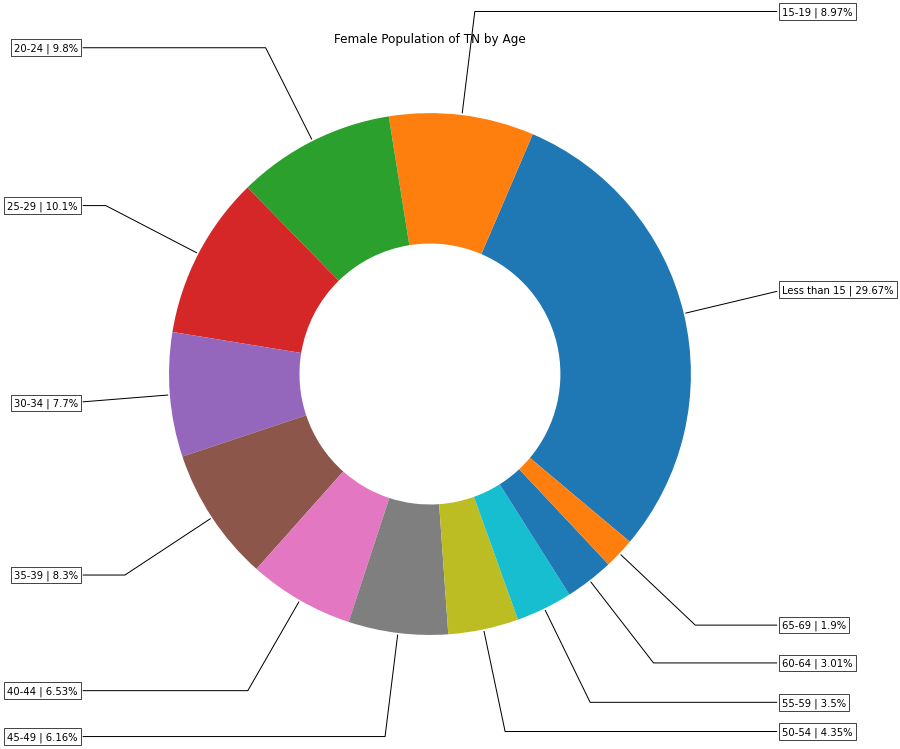

In [34]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(vals, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.title('Female Population of TN by Age')

# Women under 15 married in rural vs urban; by district

In [35]:
vals_u = []
vals_r = []
for i, row in df.iterrows():
    if row['Total/ Rural/Urban']=='Urban' and row['Present Age'] == 'Less than 15':
        vals_u.append(row['Total Women'])
    elif row['Total/ Rural/Urban']=='Rural' and row['Present Age'] == 'Less than 15':
        vals_r.append(row['Total Women'])

In [36]:
area_labels = df['Area Name'].unique()

In [37]:
for i in range(len(area_labels)):
    tmp=area_labels[i]
    area_labels[i]=tmp.split('-')[1]

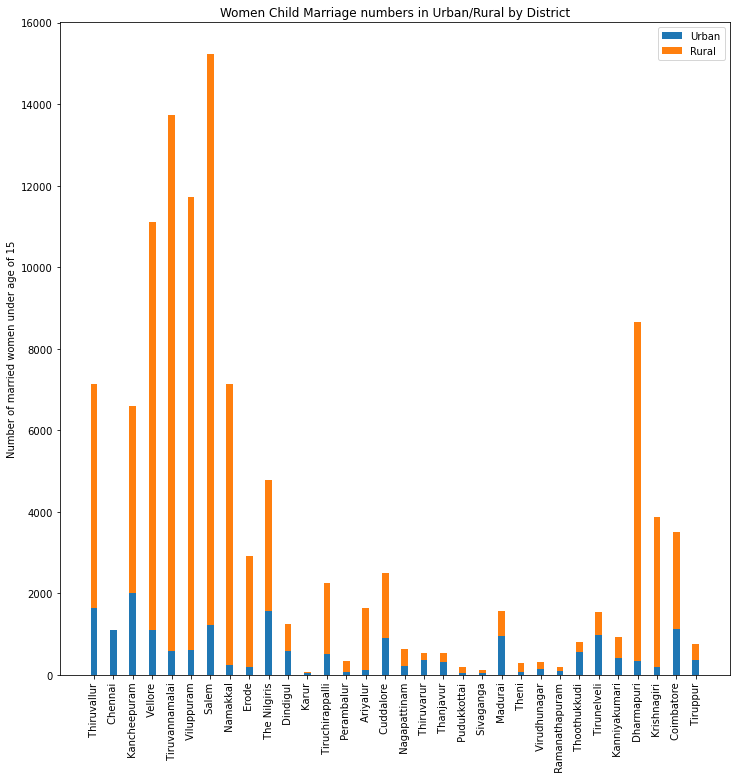

In [38]:
fig, ax = plt.subplots(figsize=(12, 12))
width = 0.35
ax.bar(area_labels[1:], vals_u[1:], width, label='Urban')
ax.bar(area_labels[1:], vals_r[1:], width, bottom=vals_u[1:],label='Rural')

ax.set_ylabel('Number of married women under age of 15')
ax.set_title('Women Child Marriage numbers in Urban/Rural by District')
ax.legend()
plt.xticks(rotation=90)
plt.show()